# AWS Budgeting

## Configuring Settings for AWS Budgeting

To set up an AWS budget for PODPAC resources, set the `AWS_BUDGET_AMOUNT` and `AWS_BUDGET_EMAIL` settings:

In [1]:
import podpac
from podpac import settings

# configure budget settings
settings["AWS_BUDGET_AMOUNT"] = 10.0             # budget for all podpac AWS resources, in USD
settings["AWS_BUDGET_EMAIL"] = "test@podpac.org" # notification e-mail for budget alarm at 80% of Budget amount

## Build AWS Node with budget

PODPAC AWS manager will use `settings` as defaults when building/updating AWS resources.

In [2]:
from podpac.managers import aws

# create a Lambda Node (uses `settings` as defaults)
node = aws.Lambda()

# build function and all resources
# This can take up to 15-20 seconds if all resources need to be created.
# Note: if AWS resources already exist, POPDAC use these resources as is and will skip the generation of these resources.
node.build()

# view details of built resources
node.describe()


Lambda Node (built)
    Function
        Name: podpac-scipy2020-demo-lambda
        Description: PODPAC Lambda Function (https://podpac.org)
        ARN: arn:aws:lambda:us-east-1:120507435541:function:podpac-scipy2020-demo-lambda
        Triggers: ['eval']
        Handler: handler.handler
        Environment Variables: {'PODPAC_UNSAFE_EVAL': 'b754a7523c574ec0b88c9c831a4e5ffb'}
        Timeout: 600 seconds
        Memory: 2048 MB
        Tags: {'_podpac_resource': 'true', '_podpac_resource_hash': '03a8239f4bee9ccdb1356e3a92189b86', 'acct': '1010267.01.005', 'owner': 'mpu'}
        Source Dist: 9DIAVAJaLlo5MKtPu+j4SweilV5bWe4G1XKhY4OijDM=
        Source Dependencies: s3://podpac-scipy2020-demo/podpac_deps.zip
        Last Modified: 2020-07-13T17:24:28.029+0000
        Version: $LATEST
        Restrict Evaluation: []

    S3
        Bucket: podpac-scipy2020-demo
        Tags: {'owner': 'mpu', '_podpac_resource': 'true', '_podpac_resource_hash': 'c76dc430c8ce28d24658154781b1c521', 'acct':

## Budget Tracking

- Resource tracking is performed using the special tag `_podpac_resource_hash`, which needs to be added manually
- You can use PODPAC to manage your budgets through Python, but you will need to manually add the cost allocation tags: https://console.aws.amazon.com/billing/home#/preferences/tags. This allows PODPAC to apply budgets specific Nodes independently.
- See budget console: https://console.aws.amazon.com/billing/home?#/budgets
- Budgets are updated **every 24 hours**, so it is still possible to over-spend in a single 24 hour period.
- Budgets are **NOT** limits. You can happily exceed your budget with no throttling of resources.


In [3]:
node.create_budget()

## Run PODPAC Lambda Node

### SinCoords Example

This example wraps a `SinCoords` node, executes it on our Lambda function, and returns the output `UnitsDataArray`.

In [4]:
import podpac
from podpac import clinspace
from podpac.managers import aws

In [5]:
sin_coords_node = podpac.algorithm.SinCoords()
coordinates = podpac.Coordinates([clinspace(-90, 90, 180), clinspace(90,-90, 180), '2018-01-01'], ['lat', 'lon', 'time'])

In [6]:
node =  podpac.managers.aws.Lambda(source=sin_coords_node)
output = node.eval(coordinates)
output

<xarray.UnitsDataArray (lat: 180, lon: 180, time: 1)>
array([[[-1.48464995e-32],
        [-4.25452289e-18],
        [-8.50380423e-18],
        ...,
        [ 8.50380423e-18],
        [ 4.25452289e-18],
        [ 1.48464995e-32]],

       [[-4.25452289e-18],
        [-1.21920760e-03],
        [-2.43691315e-03],
        ...,
        [ 2.43691315e-03],
        [ 1.21920760e-03],
        [ 4.25452289e-18]],

       [[-8.50380423e-18],
        [-2.43691315e-03],
        [-4.87082404e-03],
        ...,
        [ 4.87082404e-03],
        [ 2.43691315e-03],
        [ 8.50380423e-18]],

       ...,

       [[ 8.50380423e-18],
        [ 2.43691315e-03],
        [ 4.87082404e-03],
        ...,
        [-4.87082404e-03],
        [-2.43691315e-03],
        [-8.50380423e-18]],

       [[ 4.25452289e-18],
        [ 1.21920760e-03],
        [ 2.43691315e-03],
        ...,
        [-2.43691315e-03],
        [-1.21920760e-03],
        [-4.25452289e-18]],

       [[ 1.48464995e-32],
        [ 4.25452289e-18],
        [ 8.50380423e-18],
        ...,
        [-8.50380423e-18],
        [-4.25452289e-18],
        [-1.48464995e-32]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.99 -87.99 -86.98 ... 86.98 87.99 88.99 90.0
  * lon      (lon) float64 90.0 88.99 87.99 86.98 ... -86.98 -87.99 -88.99 -90.0
  * time     (time) datetime64[ns] 2018-01-01
Attributes:
    layer_style:   <podpac.core.style.Style object at 0x00000151032E8908>
    crs:           EPSG:4326
    geotransform:  [ 90.5027933   -1.00558659   0.         -90.5027933    0.\...

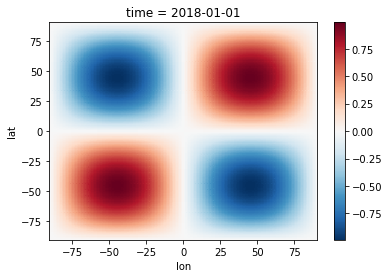

In [7]:
output.plot()